Importing Basic Libraries

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR


Loading & Exploring Dataset 

In [7]:
df=pd.read_excel("Concrete_Data.xls")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [8]:
df.head()


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


Interpolation & Extrapolation

e:\New folder (2)\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
e:\New folder (2)\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


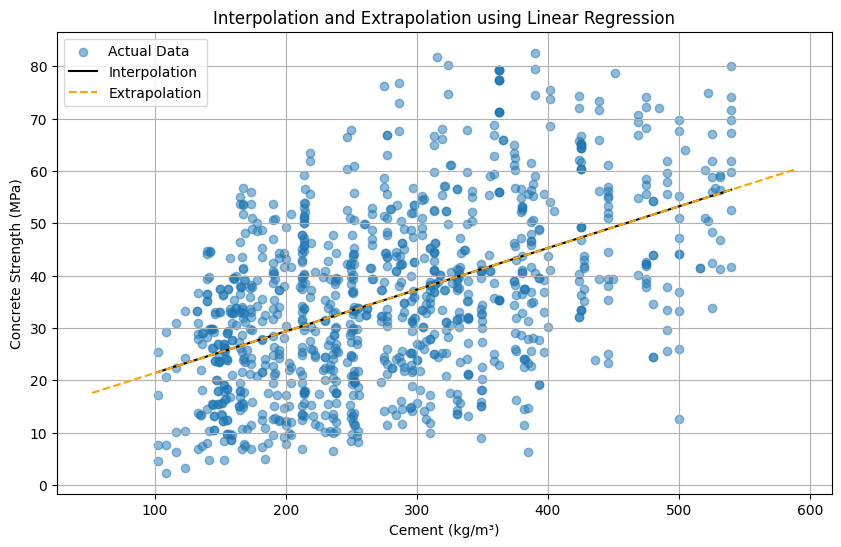

In [15]:

# Rename target column for convenience
df.rename(columns={"Concrete compressive strength(MPa, megapascals) ": "Strength"}, inplace=True)

# Use only one feature for simplicity (Cement)
X = df[["Cement (component 1)(kg in a m^3 mixture)"]]
y = df["Strength"]

# Train model
model = LinearRegression()
model.fit(X, y)

# Interpolation: Predict within the data range
cement_range_interp = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred_interp = model.predict(cement_range_interp)

# Extrapolation: Predict beyond data range (e.g., lower than min and higher than max)
cement_range_extra = np.linspace(X.min() - 50, X.max() + 50, 100).reshape(-1, 1)
y_pred_extra = model.predict(cement_range_extra)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Actual Data', alpha=0.5)
plt.plot(cement_range_interp, y_pred_interp, color='black', label='Interpolation')
plt.plot(cement_range_extra, y_pred_extra, color='orange', linestyle='--', label='Extrapolation')
plt.xlabel('Cement (kg/m³)')
plt.ylabel('Concrete Strength (MPa)')
plt.title('Interpolation and Extrapolation using Linear Regression')
plt.legend()
plt.grid(True)
plt.show()


As the black line (Interpolation) starts where the scatter dots or data is starting and extrapolation the yellow light starts before the starting of data and moves beyond the data 

LINEAR REGRESSION

e:\New folder (2)\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


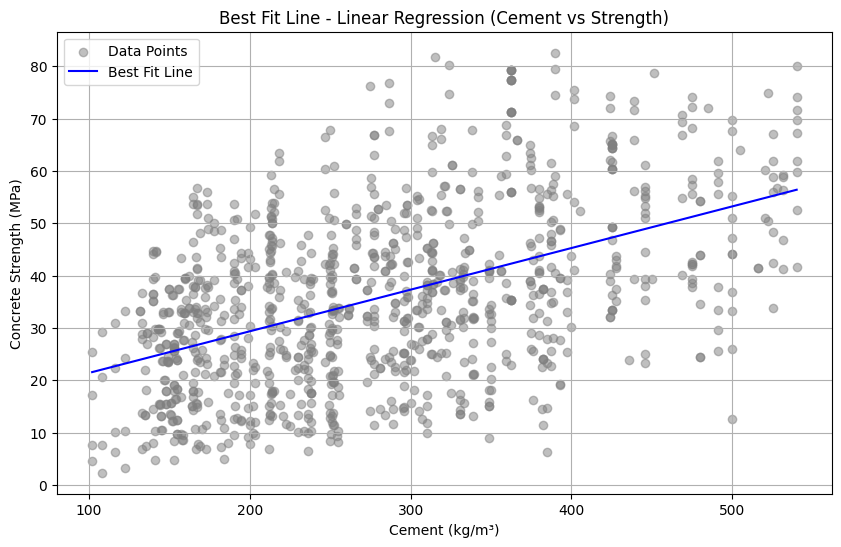

In [18]:

# Select one feature: Cement
X = df[["Cement (component 1)(kg in a m^3 mixture)"]]
y = df["Strength"]

# Train model
model = LinearRegression()
model.fit(X, y)

# Predict values for best fit line
X_fit = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_fit = model.predict(X_fit)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='gray', alpha=0.5, label='Data Points')
plt.plot(X_fit, y_fit, color='blue', label='Best Fit Line')
plt.xlabel('Cement (kg/m³)')
plt.ylabel('Concrete Strength (MPa)')
plt.title('Best Fit Line - Linear Regression (Cement vs Strength)')
plt.legend()
plt.grid(True)
plt.show()


Linear regression creates a best fit line that passes near to the most of data

LEAST SQUARES REGRESSION LINE OF Y ON X

Least Squares Regression Line: y = 0.0796x + 13.4428


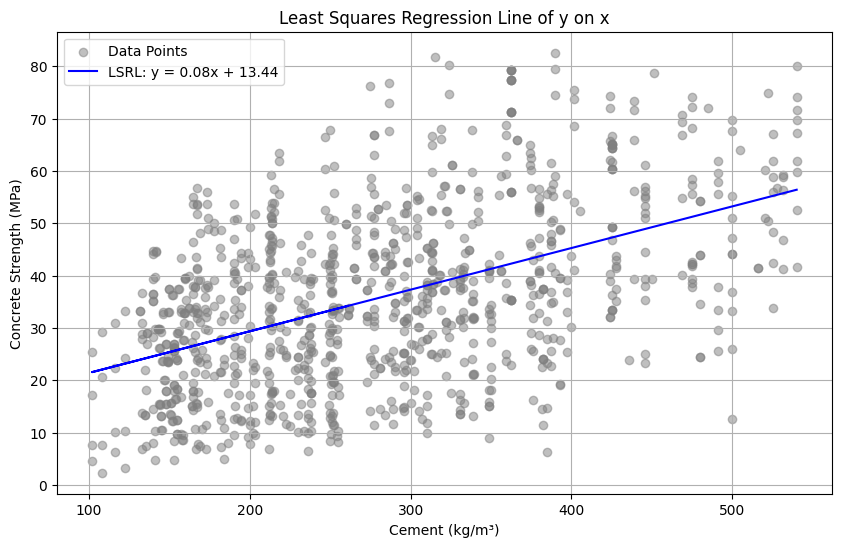

In [19]:

# Select feature and target
x = df["Cement (component 1)(kg in a m^3 mixture)"]
y = df["Strength"]

# Compute means
x_mean = np.mean(x)
y_mean = np.mean(y)

# Compute slope (m) and intercept (b)
m = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
b = y_mean - m * x_mean

# Predicted values
y_pred = m * x + b

# Print equation
print(f"Least Squares Regression Line: y = {m:.4f}x + {b:.4f}")

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='gray', alpha=0.5, label='Data Points')
plt.plot(x, y_pred, color='blue', label=f'LSRL: y = {m:.2f}x + {b:.2f}')
plt.xlabel('Cement (kg/m³)')
plt.ylabel('Concrete Strength (MPa)')
plt.title('Least Squares Regression Line of y on x')
plt.legend()
plt.grid(True)
plt.show()


it is similar to best fit line in case of linear regression

MULTIPLE REGRESSION

R² Score: 0.6275416055429021
MSE: 95.97548435337706
MAE: 7.745392872421344


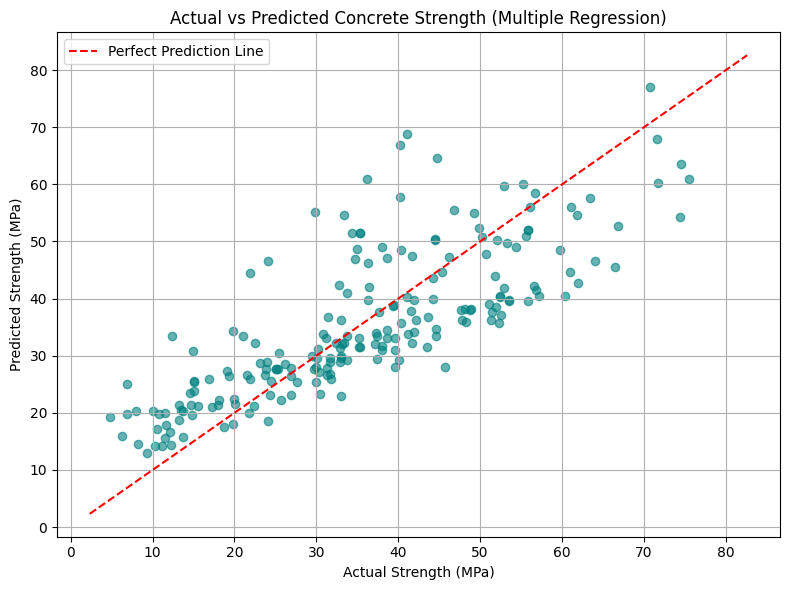

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Define features (X) and target (y)
X = df.drop("Strength", axis=1)
y = df["Strength"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='teal', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Prediction Line')
plt.xlabel("Actual Strength (MPa)")
plt.ylabel("Predicted Strength (MPa)")
plt.title("Actual vs Predicted Concrete Strength (Multiple Regression)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The best fit line passes through the point where it is near to most of the data 
Multiple regression is used when features or variabkes are more than one 

STEPWISE REGRESSION

In [27]:

# Define inputs and target
X = df.drop("Strength", axis=1)
y = df["Strength"]

# Initialize
remaining = list(X.columns)
selected = []
best_score = -np.inf

# Forward selection loop
while remaining:
    scores_with_candidates = []
    
    for candidate in remaining:
        trial_features = selected + [candidate]
        model = LinearRegression()
        scores = cross_val_score(model, X[trial_features], y, cv=5, scoring='r2')
        avg_score = scores.mean()
        scores_with_candidates.append((avg_score, candidate))
    
    scores_with_candidates.sort(reverse=True)
    best_new_score, best_candidate = scores_with_candidates[0]
    
    if best_new_score > best_score:
        selected.append(best_candidate)
        remaining.remove(best_candidate)
        best_score = best_new_score
        print(f"✅ Added: {best_candidate} | R² = {best_new_score:.4f}")
    else:
        break

print("\n🎯 Final Selected Features:", selected)


✅ Added: Cement (component 1)(kg in a m^3 mixture) | R² = 0.0158
✅ Added: Superplasticizer (component 5)(kg in a m^3 mixture) | R² = 0.1589
✅ Added: Age (day) | R² = 0.3205
✅ Added: Water  (component 4)(kg in a m^3 mixture) | R² = 0.3511
✅ Added: Blast Furnace Slag (component 2)(kg in a m^3 mixture) | R² = 0.4081
✅ Added: Fly Ash (component 3)(kg in a m^3 mixture) | R² = 0.4778

🎯 Final Selected Features: ['Cement (component 1)(kg in a m^3 mixture)', 'Superplasticizer (component 5)(kg in a m^3 mixture)', 'Age (day)', 'Water  (component 4)(kg in a m^3 mixture)', 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)', 'Fly Ash (component 3)(kg in a m^3 mixture)']


Stepwise regression kept the features with the most r2 score

POLYNOMIAL REGRESSION

e:\New folder (2)\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


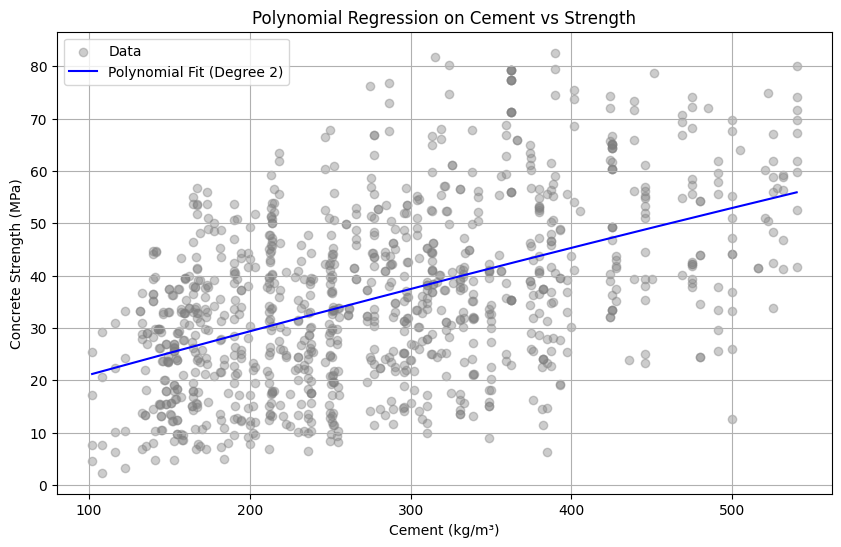

In [24]:

# Use Cement as the feature
X = df[["Cement (component 1)(kg in a m^3 mixture)"]]
y = df["Strength"]

# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Train model
model = LinearRegression()
model.fit(X_poly, y)

# Create range for plotting
X_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_pred = model.predict(X_range_poly)


# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.4, color='gray', label='Data')
plt.plot(X_range, y_pred, color='blue', label='Polynomial Fit (Degree 2)')
plt.xlabel('Cement (kg/m³)')
plt.ylabel('Concrete Strength (MPa)')
plt.title('Polynomial Regression on Cement vs Strength')
plt.legend()
plt.grid(True)
plt.show()


Degree 2 indicates that the highest polynomial degree has value 2 
but its not shown in above plot as values are not scaled 

NUMBER OF CASES

In [25]:

# Calculate number of cases and IVs
num_cases = df.shape[0]
num_ivs = df.shape[1] - 1  # Exclude the target variable (Strength)

# Calculate ratio
ratio = num_cases / num_ivs

# Display results
print("Number of Cases-to-IVs Analysis")
print("-" * 40)
print(f"Number of Samples (Cases): {num_cases}")
print(f"Number of Independent Variables (IVs): {num_ivs}")
print(f"Case-to-IV Ratio: {ratio:.2f}")

# Interpretation
if ratio >= 20:
    print("✅ Satisfies the ideal ratio (≥ 20:1).")
elif ratio >= 5:
    print("⚠️ Satisfies minimum ratio (≥ 5:1), but not ideal.")
else:
    print("❌ Does NOT satisfy minimum recommended ratio (5:1). Consider more data or fewer IVs.")


Number of Cases-to-IVs Analysis
----------------------------------------
Number of Samples (Cases): 1030
Number of Independent Variables (IVs): 8
Case-to-IV Ratio: 128.75
✅ Satisfies the ideal ratio (≥ 20:1).


in this code we have checked the number of enteries and the number of columns (Independednt Variables)

MISSING VALUES 

In [28]:
print(df.isnull().sum())


Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Strength                                                 0
dtype: int64


No null value found 

**Multicollinearity and Singularity**

C:\Users\T L S\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


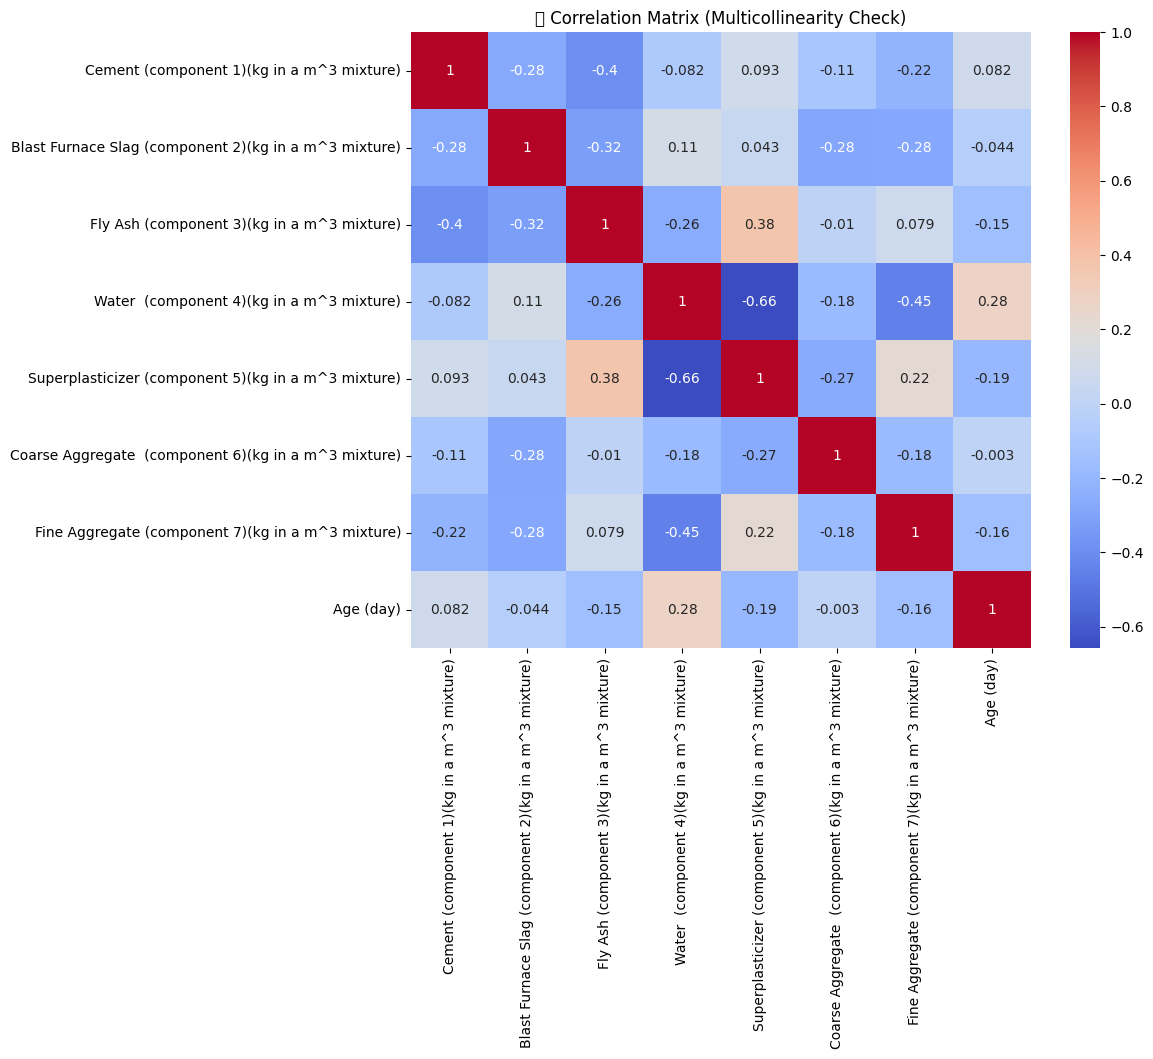

In [31]:

# Separate features and target
X = df.drop("Strength", axis=1)

# 1️⃣ Check for multicollinearity using correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title("📊 Correlation Matrix (Multicollinearity Check)")
plt.show()

# 2️⃣ Calculate Variance Inflation Factor (VIF)
# Standardize features first
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)




No singularity is detected but a multicollineraity is detected b/w water and superplasticizer

**CORRELATION**

In [33]:
df.corr()['Strength'].sort_values(ascending=False)


Strength                                                 1.000000
Cement (component 1)(kg in a m^3 mixture)                0.497833
Superplasticizer (component 5)(kg in a m^3 mixture)      0.366102
Age (day)                                                0.328877
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0.134824
Fly Ash (component 3)(kg in a m^3 mixture)              -0.105753
Coarse Aggregate  (component 6)(kg in a m^3 mixture)    -0.164928
Fine Aggregate (component 7)(kg in a m^3 mixture)       -0.167249
Water  (component 4)(kg in a m^3 mixture)               -0.289613
Name: Strength, dtype: float64

It showed the correlation

**Explained Variance Score**

In [35]:

# Example: using your concrete dataset (assuming df is loaded)
X = df.drop(columns=['Strength'])  # Features
y = df['Strength']                # Target

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Compute Explained Variance Score
evs = explained_variance_score(y_test, y_pred)

print(f"Explained Variance Score: {evs:.4f}")


Explained Variance Score: 0.6275


**Mean Absolute Error, Mean Squared Error, R2**

In [39]:

# Step 1: Define Features and Target
X = df.drop(columns=['Strength'])  
y = df['Strength']                 

# Step 2: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 3: Fit Multiple Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Predict
y_pred = model.predict(X_test)

# Step 5: Compute Mean Absolute Error

# Step 5: Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 6: Print results
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 7.7454
Mean Squared Error (MSE): 95.9755
R² Score: 0.6275


MSE,MAE,R2 Score showed the evaluation of our model


**RESIDUALS**

        Actual  Predicted   Residual
31   52.908320  59.657163  -6.748843
109  55.895819  52.037144   3.858676
136  74.497882  63.519839  10.978042
88   35.301171  51.571366 -16.270195
918  10.535193  17.220160  -6.684967


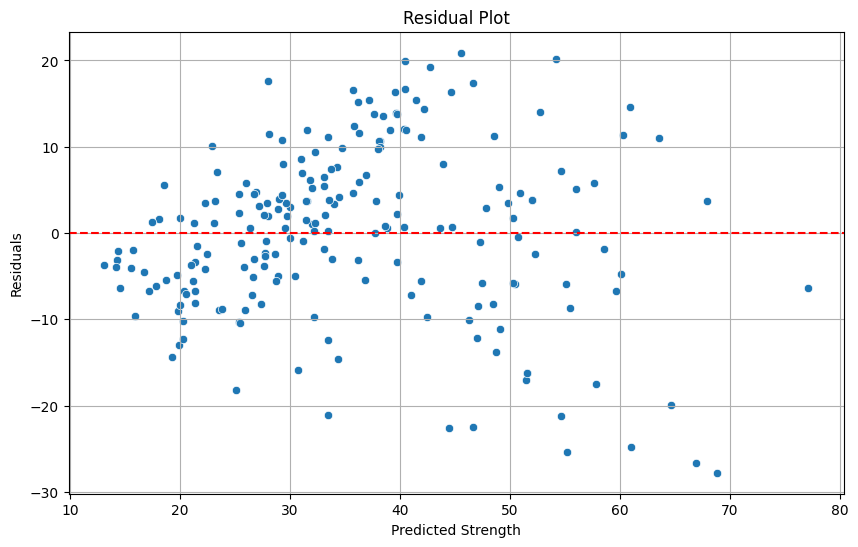

In [40]:

# Step 1: Compute residuals
residuals = y_test - y_pred

# Step 2: Create a DataFrame to inspect
residuals_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Residual': residuals})

# Step 3: Print sample residuals
print(residuals_df.head())

# Step 4: Plot residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Strength')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()


**Squared Residual Plots**

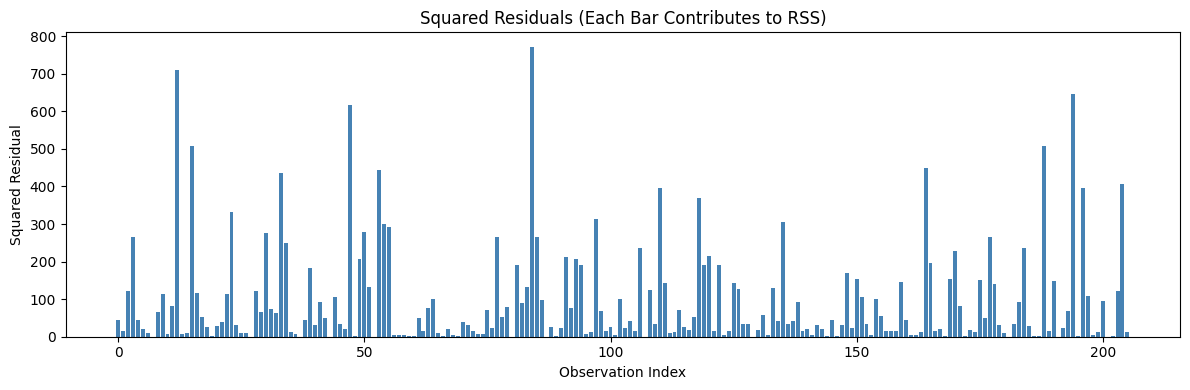

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Compute residuals and squared residuals
residuals = y_test - y_pred
squared_residuals = residuals ** 2

# Step 2: Plot squared residuals
plt.figure(figsize=(12, 4))
plt.bar(range(len(squared_residuals)), squared_residuals, color='steelblue')
plt.title('Squared Residuals (Each Bar Contributes to RSS)')
plt.xlabel('Observation Index')
plt.ylabel('Squared Residual')
plt.tight_layout()
plt.show()


**GRID SEARCH**

In [45]:

# Step 1: Split your data (if not already done)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 2: Define model
model = LinearRegression()

# Step 3: Define hyperparameters grid (for LinearRegression, limited options)
param_grid = {
    'fit_intercept': [True, False],  # Only works in older versions or with warnings
    'positive': [True, False]
}

# Step 4: Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Step 5: Best parameters and model
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Step 6: Evaluate on test data
y_pred = best_model.predict(X_test)
print(f"Test R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"Test MSE: {mean_squared_error(y_test, y_pred):.4f}")


Best Parameters: {'fit_intercept': False, 'positive': False}
Test R² Score: 0.6280
Test MSE: 95.8552


it tells us which oarameters hould we use in our model

**RIDGE REGRESSION**

R² Score: 0.6275417727142357
MSE: 95.9754412764859
MAE: 7.745389426046363


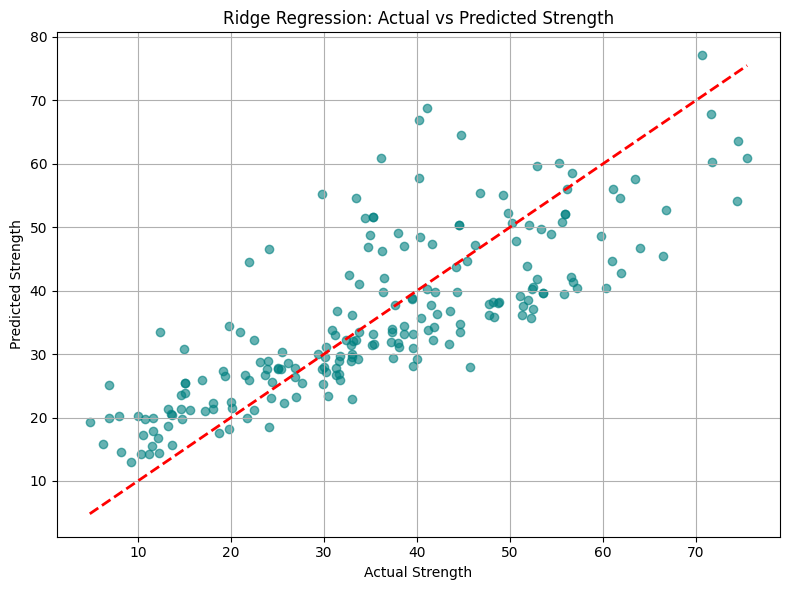

In [54]:

X = df.drop('Strength', axis=1)
y = df['Strength']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Ridge model with an alpha value (regularization strength)
ridge_model = Ridge(alpha=1.0)

# Fit model
ridge_model.fit(X_train, y_train)

# Predict
y_pred = ridge_model.predict(X_test)

# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='teal', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Strength')
plt.ylabel('Predicted Strength')
plt.title('Ridge Regression: Actual vs Predicted Strength')
plt.grid(True)
plt.tight_layout()
plt.show()

Ridge regression uses a penalty to avoid multilinearilty

**LASSSO REGRESION**

R² Score: 0.6275630625810789
MSE: 95.96995528043239
MAE: 7.745204044846558


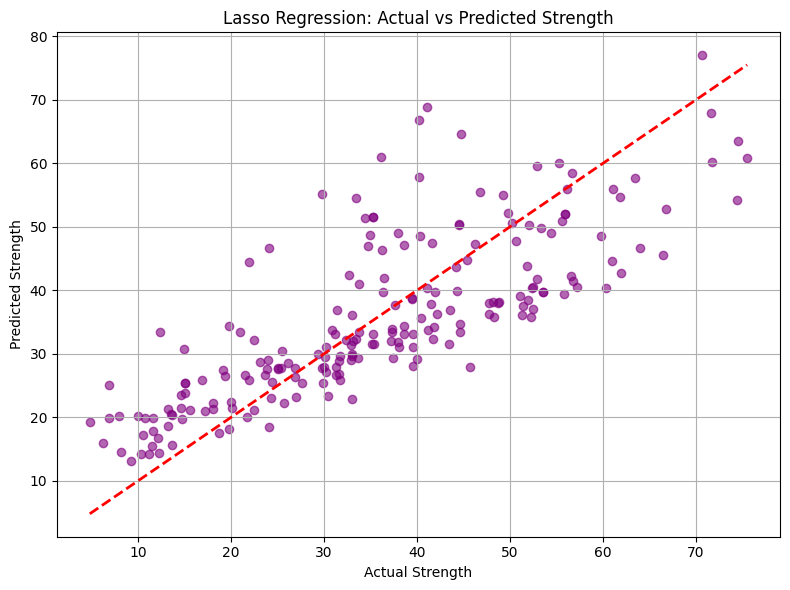

In [55]:

# and target column is 'Concrete compressive strength(MPa, megapascals)'
X = df.drop('Strength', axis=1)
y = df['Strength']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Lasso model
lasso_model = Lasso(alpha=0.1)  # alpha is the regularization strength

# Fit the model
lasso_model.fit(X_train, y_train)

# Predict
y_pred = lasso_model.predict(X_test)

# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='purple', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Strength')
plt.ylabel('Predicted Strength')
plt.title('Lasso Regression: Actual vs Predicted Strength')
plt.grid(True)
plt.tight_layout()
plt.show()


Lasso regression uses l1 norm to avoid multicollinearilty 

**ELASTICNET**

R² Score: 0.627559203056042
MSE: 95.97094980704341
MAE: 7.745159355484949


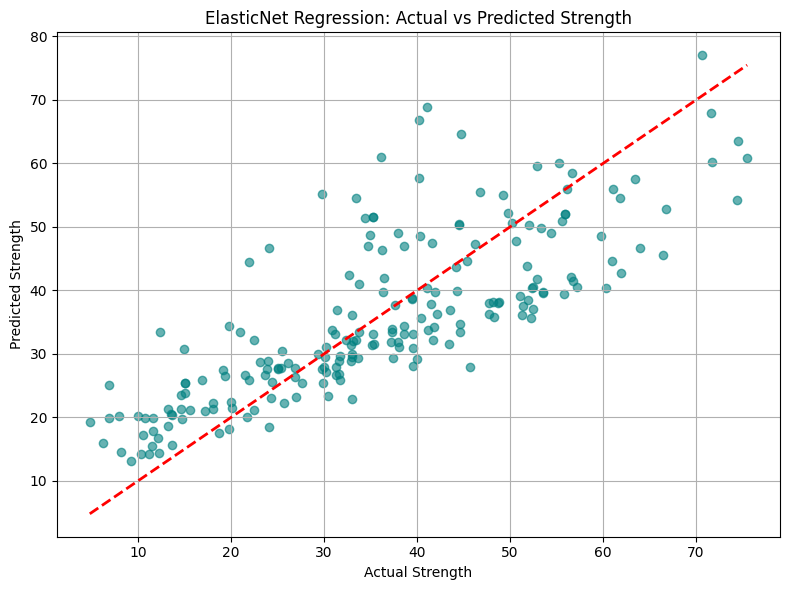

In [56]:


# Features and target
X = df.drop('Strength', axis=1)
y = df['Strength']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize ElasticNet model
elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)  
# alpha: overall regularization strength


# Fit the model
elastic_model.fit(X_train, y_train)

# Predictions
y_pred = elastic_model.predict(X_test)

# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='teal', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Strength')
plt.ylabel('Predicted Strength')
plt.title('ElasticNet Regression: Actual vs Predicted Strength')
plt.grid(True)
plt.tight_layout()
plt.show()

Elasticnet is a combination of ridge regression and lasso regression

**GRADIENT BOOST REGRESSION**

R² Score: 0.8807977598117096
MSE: 30.716162954937893
MAE: 4.1006106131847


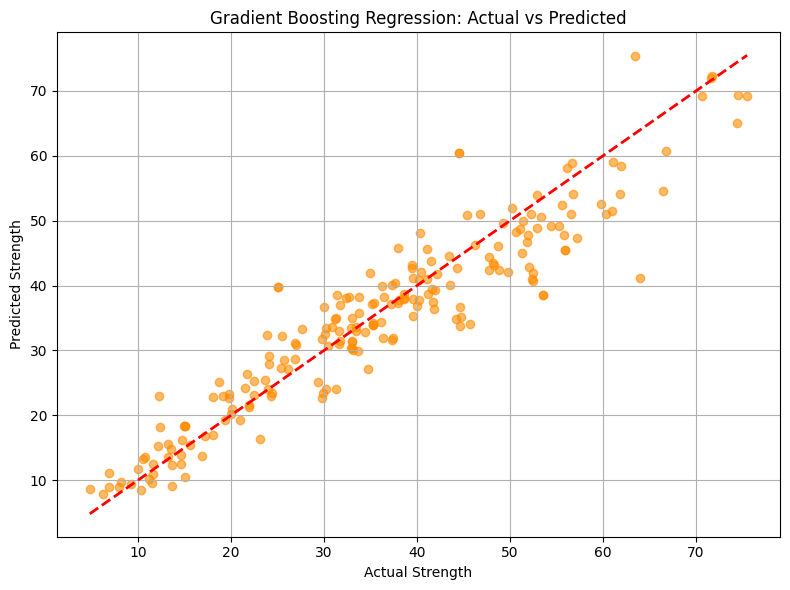

In [58]:

# Features and target
X = df.drop('Strength', axis=1)
y = df['Strength']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model
gbr.fit(X_train, y_train)

# Predict
y_pred = gbr.predict(X_test)

# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='darkorange', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Strength')
plt.ylabel('Predicted Strength')
plt.title('Gradient Boosting Regression: Actual vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()

Gradient boost regressor commonly used decision trees to create a perfect model

**Support Vector Machines**

R² Score: 0.8644438239323147
MSE: 34.93026294695671
MAE: 3.9270430698519934


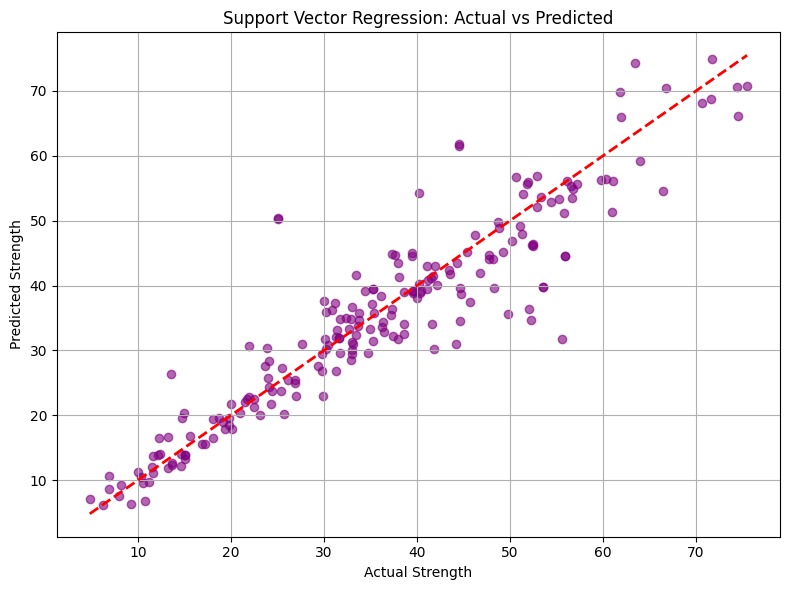

In [60]:

# Features and target
X = df.drop('Strength', axis=1)
y = df['Strength']

# Scaling the features and target
X_scaler = StandardScaler()
y_scaler = StandardScaler()

X_scaled = X_scaler.fit_transform(X)
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1)).ravel()

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Initialize SVR model
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)

# Fit the model
svr_model.fit(X_train, y_train)

# Predict (remember to inverse transform the scaled prediction)
y_pred_scaled = svr_model.predict(X_test)
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
y_test_actual = y_scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()

# Evaluation
print("R² Score:", r2_score(y_test_actual, y_pred))
print("MSE:", mean_squared_error(y_test_actual, y_pred))
print("MAE:", mean_absolute_error(y_test_actual, y_pred))

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test_actual, y_pred, color='purple', alpha=0.6)
plt.plot([min(y_test_actual), max(y_test_actual)],
         [min(y_test_actual), max(y_test_actual)], 'r--', linewidth=2)
plt.xlabel('Actual Strength')
plt.ylabel('Predicted Strength')
plt.title('Support Vector Regression: Actual vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()


Svm is best for small datasets it keeps a margin will predicting values3